# Модули

In [ ]:
import pandas as pd
import pyreadstat #Для чтения файлов SPSS
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
#Нам нужен упорядоченный словарь для системы уравнений
from collections import OrderedDict
#Для оценки систем одновременных уравнений
from linearmodels.system import SUR
import missingno as msno
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.ticker as ticker
from sympy import *
import patsy
import numpy as np

In [1]:
#Задействованные модули
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Загрузка данных
Эта и предыдущая главы должны быть в дао=льнейшем преобразованы в Python package

In [2]:
waves_dict={1994:[5,'A'],
           1995:[6,'B'],
           1996:[7,'C'],
           1998:[8,'D'],
           2000:[9,'E'],
           2001:[10,'F'],
           2002:[11,'G'],
           2003:[12,'H'],
           2004:[13,'I'],
           2005:[14,'J'],
           2006:[15,'K'],
           2007:[16,'L'],
           2008:[17,'M'],
           2009:[18,'N'],
           2010:[19,'O'],
           2011:[20,'P'],
           2012:[21,'Q'],
           2013:[22,'R'],
           2014:[23,'S'],
           2015:[24,'T'],
           2016:[25,'U'],
           2017:[26,'V'],
           2018:[27,'W'],
           2019:[28,'X'],
           2020:[29,'Y'],
           2021:[30,'Z'] 
           }

In [3]:
# Загрузка фрейма данных волны выбранного года из папки
def download_wave_ind(year,path=r'C:\Users\user\Desktop\Saved\Репрезентативная выборка 06.09.2022'):
    if (year<1994) or (year==1997) or (year==1999):
        print('Волны {0} года не существует.'.format(year))
    else:
        filename=os.listdir(r'{0}\{1}-я волна\ИНДИВИДЫ'.format(path,waves_dict[year][0]))[0]
        return pd.read_spss(r'{0}\{1}-я волна\ИНДИВИДЫ\{2}'.format(path,waves_dict[year][0],filename))

In [4]:
# Загрузка в словарь нескольких волн исследования
def download_period_ind(period,path):
    dict_ind_period={}
    for i in period:
        if (i<1994) or (i==1997) or (i==1999):
            print('Волны {0} года не существует.'.format(i))
            continue
        dict_ind_period[i]=download_wave_ind(i,path)
        print('Загружен ',i)
    return dict_ind_period

In [5]:
# Загрузка данных для работы FAST-функций
def FAST_variable_ind(path):
    global FAST_INDS_DFS
    FAST_INDS_DFS=download_period_ind(list(range(1993,2022)),path=path)

In [ ]:
FAST_variable_ind(path=r'C:\Users\user\Desktop\Saved\Репрезентативная выборка 06.09.2022')

Волны 1993 года не существует.
Загружен  1994
Загружен  1995
Загружен  1996
Волны 1997 года не существует.
Загружен  1998
Волны 1999 года не существует.
Загружен  2000
Загружен  2001
Загружен  2002
Загружен  2003
Загружен  2004
Загружен  2005
Загружен  2006
Загружен  2007
Загружен  2008
Загружен  2009
Загружен  2010
Загружен  2011
Загружен  2012


# Отбор политически релевантных переменных
Возможно будет оптимальнее загрузить данные RLMS-HSE и Codebook на облако, чтобы любой пользователь мог оттуда ее выгрузить без нужды ручной работы по загрузке данных с сайта ВШЭ, который требует авторизации. 

In [7]:
codebook=pd.read_spss(r'C:\Users\user\Desktop\Codebook_БД_ind_USER_1994_2021.sav')

In [8]:
codebook.loc[codebook.variable_labels!='']

,name,variable_labels,all_year,code_value_labels,value_labels,R5_A_1994,R6_B_1995,R7_C_1996,R8_D_1998,R9_E_2000,...,R21_Q_2012,R22_R_2013,R23_S_2014,R24_T_2015,R25_U_2016,R26_V_2017,R27_W_2018,R28_X_2019,R29_Y_2020,R30_Z_2021
0,id_w,НОМЕР ВОЛНЫ,,5,1994 год,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,idind,Единый идентификационный номер индивида для во...,1994 1995 1996 1998 2000 2001 2002 2003 2004 2...,,,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
27,year,ГОД ПРОВЕДЕНИЯ ИССЛЕДОВАНИЯ,,,,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,redid_i,НОМЕР ИНДИВИДА - СПЛОШНАЯ НУМЕРАЦИЯ,1994 1995 1996 1998 2000 2001 2002 2003 2004 2...,,,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
29,id_i,НОМЕР ИНДИВИДА - ИДЕНТИФИКАЦИОННЫЙ - УНИКАЛЬНЫ...,1994 1995 1996 1998 2000 2001 2002 2003 2004 2...,,,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13849,s3_l,"ОТМЕТЬТЕ, КАК РЕСПОНДЕНТ ПОНИМАЛ ВОПРОСЫ по во...",2011,1,ХОРОШО,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13855,s4_l,ОЦЕНИТЕ ПОВЕДЕНИЕ РЕСПОНДЕНТА ВО ВРЕМЯ ИНТЕРВЬ...,2011,1,НЕРВНИЧАЛ,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13861,s5_l,ОЦЕНИТЕ СООБРАЗИТЕЛЬНОСТЬ РЕСПОНДЕНТА по вопро...,2011,1,ОЧЕНЬ НЕСООБРАЗИТЕЛЬНЫЙ,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13868,s6_l,ОЦЕНИТЕ ИСКРЕННОСТЬ И ОТКРЫТОСТЬ РЕСПОНДЕНТА п...,2011,1,"ОЧЕНЬ ЗАКРЫТЫЙ, НЕИСКРЕННИЙ",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
for i in codebook.name.index:
    if codebook.name[i]!='':
        print(i,codebook.name[i],codebook.variable_labels[i])
        print()

0 id_w НОМЕР ВОЛНЫ

26 idind Единый идентификационный номер индивида для волн 5 и последующих

27 year ГОД ПРОВЕДЕНИЯ ИССЛЕДОВАНИЯ

28 redid_i НОМЕР ИНДИВИДА - СПЛОШНАЯ НУМЕРАЦИЯ

29 id_i НОМЕР ИНДИВИДА - ИДЕНТИФИКАЦИОННЫЙ - УНИКАЛЬНЫЙ ВНУТРИ ВОЛНЫ

30 id_h НОМЕР ДОМОХОЗЯЙСТВА - ИДЕНТИФИКАЦИОННЫЙ - УНИКАЛЬНЫЙ ВНУТРИ ВОЛНЫ

31 origsm АДРЕС РЕПРЕЗЕНТАТИВНОЙ ВЫБОРКИ

33 inwgt Постстратификационный вес для данного индивида

34 region Регион

75 psu ПЕРВИЧНАЯ ЕДИНИЦА ОТБОРА

113 status ТИП НАСЕЛЕННОГО ПУНКТА

117 popul ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ

118 int_y ГОД ПРОВЕДЕНИЯ ИНТЕРВЬЮ

119 adult Есть взрослый вопросник?

121 child Есть детский вопросник?

123 marst СЕМЕЙНОЕ ПОЛОЖЕНИЕ В ТЕКУЩЕЙ ВОЛНЕ

133 occup08 ПРОФЕССИОНАЛЬНАЯ ГРУППА - по коду J2COD08

146 educ ОБРАЗОВАНИЕ (ПОДРОБНО): старше 14 лет

173 diplom ЗАКОНЧЕННОЕ ОБРАЗОВАНИЕ (ГРУППА)

182 diplom_1 НАИБОЛЕЕ ВЕРОЯТНОЕ ЗАКОНЧЕННОЕ ОБРАЗОВАНИЕ (ГРУППА)

191 site НОМЕР НАСЕЛЕННОГО ПУНКТА

192 h3 Номер семьи

193 h4 Номер члена семьи

194 h4.1 Р

6994 j229195 В какие годы Вы теряли работу из-за закрытия предприятия или сокращения штатов? (1995 г.)

6995 j229196 В какие годы Вы теряли работу из-за закрытия предприятия или сокращения штатов? (1996 г.)

6996 j229197 В какие годы Вы теряли работу из-за закрытия предприятия или сокращения штатов? (1997 г.)

6997 j229198 В какие годы Вы теряли работу из-за закрытия предприятия или сокращения штатов? (1998 г.)

6998 j229199 В какие годы Вы теряли работу из-за закрытия предприятия или сокращения штатов? (1999 г.)

6999 j229100 В какие годы Вы теряли работу из-за закрытия предприятия или сокращения штатов? (2000 г.)

7000 j229101 В какие годы Вы теряли работу из-за закрытия предприятия или сокращения штатов? (2001 г.)

7001 j229102 В какие годы Вы теряли работу из-за закрытия предприятия или сокращения штатов? (2002 г.)

7002 j229103 В какие годы Вы теряли работу из-за закрытия предприятия или сокращения штатов? (2003 г.)

7003 j229104 В какие годы Вы теряли работу из-за закрытия предпр

In [10]:
pol_relevant_quests={
    'Лучшая политическая система для России':'j107',
    'Одобрение Путина':'j110' ,
    'Приходится ли давать взятки?':'j112',
    'Правовой нигилизм':'j114',
    'Социальная прогрессивность': 'j121',
    'Либеральные ценности':'j208',
    'Как стать миллионером?': ['j211.01','j211.02','j211.03','j211.04','j211.05','j211.06','j211.07'],
    'Почему бедные - бедные?':'j212',
    'Что в нашем обществе сегодня люди уважают больше всего?':'j213',
    'Как победить неравенство?' : 'j214',
    'Рынок или государство предоставляют общ. блага?':'j220',
    'Рынок или государство':['j221','j69.5'],
    'Авторитарность':'j410',
    'Ксенофобия':'j69.3',
    'Отношение к цензуре':'j128',
    'Доверие институтам':'j207',
    'Государственная религия':'j127',
    'Сексизм':['j69.6','j69.6.1','j69.6.2','j69.6.3'],
    'Поддвергались ли вы грабежу последние 5 лет?':'j332',
    'Кто может вывести Россию из кризиса?':'j102'
}

In [11]:
def flatten(list_of_lists):
    if len(list_of_lists) == 0:
        return list_of_lists
    if isinstance(list_of_lists[0], list):
        return flatten(list_of_lists[0]) + flatten(list_of_lists[1:])
    return list_of_lists[:1] + flatten(list_of_lists[1:])

In [12]:
flatten(list(pol_relevant_quests.values()))

['j107',
 'j110',
 'j112',
 'j114',
 'j121',
 'j208',
 'j211.01',
 'j211.02',
 'j211.03',
 'j211.04',
 'j211.05',
 'j211.06',
 'j211.07',
 'j212',
 'j213',
 'j214',
 'j220',
 'j221',
 'j69.5',
 'j410',
 'j69.3',
 'j128',
 'j207',
 'j127',
 'j69.6',
 'j69.6.1',
 'j69.6.2',
 'j69.6.3',
 'j332',
 'j102']

In [13]:
list(pol_relevant_quests.values())

['j107',
 'j110',
 'j112',
 'j114',
 'j121',
 'j208',
 ['j211.01', 'j211.02', 'j211.03', 'j211.04', 'j211.05', 'j211.06', 'j211.07'],
 'j212',
 'j213',
 'j214',
 'j220',
 ['j221', 'j69.5'],
 'j410',
 'j69.3',
 'j128',
 'j207',
 'j127',
 ['j69.6', 'j69.6.1', 'j69.6.2', 'j69.6.3'],
 'j332',
 'j102']

In [14]:
pol_df=(codebook.loc[codebook['name'].isin(flatten(list(pol_relevant_quests.values())))])

In [15]:
pol_df

,name,variable_labels,all_year,code_value_labels,value_labels,R5_A_1994,R6_B_1995,R7_C_1996,R8_D_1998,R9_E_2000,...,R21_Q_2012,R22_R_2013,R23_S_2014,R24_T_2015,R25_U_2016,R26_V_2017,R27_W_2018,R28_X_2019,R29_Y_2020,R30_Z_2021
1803,j69.3,А такое высказывание - оно про Вас или не про ...,1996 1998 2000 2002 2003 2004 2005 2006 2007 2...,1,Это точно про Вас,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991,j69.5,"Согласны или не согласны Вы с тем, что лучше р...",1996 1998 2000 2002,1,Полноcтью cоглacны,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,j69.6,"Согласны или не согласны Вы с тем, что при уст...",1996 1998,1,Полноcтью cоглacны,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007,j69.6.1,"Согласны или не согласны Вы с тем, что для сем...",2000,1,Полноcтью cоглacны,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014,j69.6.2,"Согласны или не согласны вы с тем, что если же...",2000,1,Полноcтью cоглacны,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021,j69.6.3,"Как Вы считаете, мужчины и женщины имеют равны...",2000,1,Имеют равные возможности устроиться на хорошую...,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5197,j107,"Какая политическая система, на Ваш взгляд, бол...",2000 2001,1,"Советская система, которая была в нашей стране...",0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5225,j110,Одним людям нравится деятельность Владимира Пу...,2000 2001 2002 2003,1,Полностью одобряете,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5263,j112,"Скажите, пожалуйста, как Вам подсказывает жизн...",2001,1,Да,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5274,j114,"Согласны или не согласны Вы с тем, что совсем ...",2001,1,Полностью согласны,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
for i in pol_df.index:
    print(pol_df.name[i], pol_df.variable_labels[i])

j69.3 А такое высказывание - оно про Вас или не про Вас: "Мне кажется, что у меня мало таких качеств, которые ценятся в сегодняшней экономической ситуации"?
j69.5 Согласны или не согласны Вы с тем, что лучше работать на частного хозяина, чем на государство: и порядка больше, и заработки выше?
j69.6 Согласны или не согласны Вы с тем, что при устройстве на любую работу мужчины и женщины должны иметь равные возможности?
j69.6.1 Согласны или не согласны Вы с тем, что для семьи обычно плохо, если жена работает?
j69.6.2 Согласны или не согласны вы с тем, что если жена работает, то она пользуется в семье большим уважением, чем если она просто является домохозяйкой?
j69.6.3 Как Вы считаете, мужчины и женщины имеют равные возможности устроиться на хорошую, высоко оплачиваемую работу или у мужчин такая возможность больше или у женщин такая возможность больше?
j107 Какая политическая система, на Ваш взгляд, больше всего подходит для России?
j110 Одним людям нравится деятельность Владимира Путина,

In [17]:
year_book={}
for j in range(1994,2022):
    if j==1997 or j==1999:
        continue
    year_book[j]=list()
    for i in FAST_INDS_DFS[j].columns:
        if ('j107' in i.lower()):
            print(j,i, 'Лучшая политическая система для России')
            year_book[j].append('Лучшая политическая система для России')
            
        if ("j110" in i) or ("J110" in i):
            print(j,i, 'Одобрение Путина')
            year_book[j].append('Одобрение Путина')
            
        if ("j112" in i) or ("J112" in i):
            print(j,i, 'Приходится ли давать взятки?')
            year_book[j].append('Приходится ли давать взятки?')
            
        if ("j114" in i) or ("J114" in i):
            print(j,i, 'Правовой нигилизм')
            year_book[j].append('Правовой нигилизм')
            
        if ("j121" in i) or ("J121" in i):
            print(j,i, 'Социальная прогрессивность')
            year_book[j].append('Социальная прогрессивность')
            
        if ("j138" in i) or ("J138" in i):
            print(j,i)
            
        if ("j208" in i) or ("J208" in i):
            print(j,i,'Либеральные ценности')
            year_book[j].append('Либеральные ценности')
            
        if ("j209" in i) or ("J209" in i):
            print(j,i)
            
        if ("j210" in i) or ("J210" in i):
            print(j,i)
            
        if (("j211" in i) or ("J211" in i)):
            if "j211.10" not in i.lower():
                if "j211.11" not in i.lower():
                    if "j211.12" not in i.lower():
                        print(j,i,'Как стать миллионером?')
                        year_book[j].append('Как стать миллионером?')
                        
        if ("j212" in i) or ("J212" in i):
            print(j,i, 'Почему бедные - бедные?')
            year_book[j].append('Почему бедные - бедные?')
            
            
        if ("j213" in i) or ("J213" in i):
            print(j,i, 'Что в нашем обществе сегодня люди уважают больше всего?')
            year_book[j].append('Что в нашем обществе сегодня люди уважают больше всего?')
            
        if ("j214" in i) or ("J214" in i):
            print(j,i, 'Как победить неравенство?')
            year_book[j].append('Как победить неравенство?')
            
        if ("j220" in i) or ("J220" in i):
            print(j,i, 'Рынок или государство предоставляют общ. блага?')
            year_book[j].append('Рынок или государство предоставляют общ. блага?')
            
            
        if ("j221" in i) or ("J221" in i):
            print(j,i, 'Рынок или государство')
            year_book[j].append('Рынок или государство')
            
        if ("j410" in i) or ("J410" in i):
            print(j,i,'Авторитарность')
            year_book[j].append('Авторитарность')
            
        if ("J69.3" in i) or ("j69.3" in i):
            print(j,i, 'Ксенофобия')
            year_book[j].append('Ксенофобия')
            
        if ("J128" in i) or ("j128" in i):
            print(j,i, 'Отношение к цензуре')
            year_book[j].append('Отношение к цензуре')
            
        if ("J207" in i) or ("j207" in i):
            print(j,i, 'Доверие институтам')
            year_book[j].append('Доверие институтам')
            
        if ("J127" in i) or ("j127" in i):
            print(j,i, 'Государственная религия')
            year_book[j].append('Государственная религия')
            
        if ("J69.6" in i) or ("j69.6" in i):
            print(j,i, 'Сексизм') 
            year_book[j].append('Сексизм')
            
        if ("j332" in i) or ("j332" in i):
            print(j,i, 'Поддвергались ли вы грабежу последние 5 лет?') 
            year_book[j].append('Поддвергались ли вы грабежу последние 5 лет?')
            
        if ("J102" in i) or ("j102" in i):
            print(j,i, 'Кто может вывести Россию из кризиса?')
            year_book[j].append('Кто может вывести Россию из кризиса?')
            
            

1996 cj69.3 Ксенофобия
1996 cj69.6 Сексизм
1998 dj69.3 Ксенофобия
1998 dj69.6 Сексизм
1998 dj102.1 Кто может вывести Россию из кризиса?
1998 dj102.2 Кто может вывести Россию из кризиса?
1998 dj102.3 Кто может вывести Россию из кризиса?
1998 dj102.4 Кто может вывести Россию из кризиса?
1998 dj102.5 Кто может вывести Россию из кризиса?
1998 dj102.6 Кто может вывести Россию из кризиса?
1998 dj102.8 Кто может вывести Россию из кризиса?
1998 dj102.9 Кто может вывести Россию из кризиса?
1998 dj102.9s Кто может вывести Россию из кризиса?
2000 ej69.3 Ксенофобия
2000 ej69.3a Ксенофобия
2000 ej69.6.1 Сексизм
2000 ej69.6.2 Сексизм
2000 ej69.6.3 Сексизм
2000 ej69.6.5 Сексизм
2000 ej107 Лучшая политическая система для России
2000 ej107s Лучшая политическая система для России
2000 ej110 Одобрение Путина
2001 fj69.6.5 Сексизм
2001 fj69.3b Ксенофобия
2001 fj107 Лучшая политическая система для России
2001 fj107s Лучшая политическая система для России
2001 fj110 Одобрение Путина
2001 fj112 Приходится ли

In [18]:
resulters={}
for key,value in year_book.items():
    if value not in resulters.values():
        resulters[key] = value
resulters

{1994: [],
 1996: ['Ксенофобия', 'Сексизм'],
 1998: ['Ксенофобия',
  'Сексизм',
  'Кто может вывести Россию из кризиса?',
  'Кто может вывести Россию из кризиса?',
  'Кто может вывести Россию из кризиса?',
  'Кто может вывести Россию из кризиса?',
  'Кто может вывести Россию из кризиса?',
  'Кто может вывести Россию из кризиса?',
  'Кто может вывести Россию из кризиса?',
  'Кто может вывести Россию из кризиса?',
  'Кто может вывести Россию из кризиса?'],
 2000: ['Ксенофобия',
  'Ксенофобия',
  'Сексизм',
  'Сексизм',
  'Сексизм',
  'Сексизм',
  'Лучшая политическая система для России',
  'Лучшая политическая система для России',
  'Одобрение Путина'],
 2001: ['Сексизм',
  'Ксенофобия',
  'Лучшая политическая система для России',
  'Лучшая политическая система для России',
  'Одобрение Путина',
  'Приходится ли давать взятки?',
  'Правовой нигилизм'],
 2002: ['Ксенофобия', 'Одобрение Путина'],
 2003: ['Ксенофобия',
  'Социальная прогрессивность',
  'Социальная прогрессивность',
  'Социа

In [19]:
new_dict = {a:list(set(b)) for a, b in year_book.items()}
new_dict

{1994: [],
 1995: [],
 1996: ['Ксенофобия', 'Сексизм'],
 1998: ['Ксенофобия', 'Сексизм', 'Кто может вывести Россию из кризиса?'],
 2000: ['Одобрение Путина',
  'Лучшая политическая система для России',
  'Ксенофобия',
  'Сексизм'],
 2001: ['Одобрение Путина',
  'Правовой нигилизм',
  'Лучшая политическая система для России',
  'Приходится ли давать взятки?',
  'Сексизм',
  'Ксенофобия'],
 2002: ['Одобрение Путина', 'Ксенофобия'],
 2003: ['Отношение к цензуре',
  'Одобрение Путина',
  'Социальная прогрессивность',
  'Государственная религия',
  'Ксенофобия'],
 2004: ['Ксенофобия'],
 2005: ['Ксенофобия'],
 2006: ['Либеральные ценности',
  'Рынок или государство предоставляют общ. блага?',
  'Как победить неравенство?',
  'Почему бедные - бедные?',
  'Рынок или государство',
  'Как стать миллионером?',
  'Ксенофобия',
  'Доверие институтам',
  'Что в нашем обществе сегодня люди уважают больше всего?'],
 2007: ['Ксенофобия'],
 2008: ['Ксенофобия'],
 2009: ['Поддвергались ли вы грабежу посл

# Политически релевантные переменные

Важно помнить тот факт, что не всякая политическая переменная встречается во всех волнах исследования RLMS. Более того, в большинстве волн они вовсе не встречаются. Поэтому необходимо просканировать все волны исследования на политические переменнные

In [135]:
autho_dict={
'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ':np.nan,
'ОТКАЗ ОТ ОТВЕТА': np.nan,
'НЕТ ОТВЕТА':np.nan,
'СТАТЬ БОЛЕЕ ДЕМОКРАТИЧНОЙ':1.0,
'УСИЛИТЬ КОНТРОЛЬ НАД ПОЛИТИКОЙ': 11.0 ,
'ОСТАТЬСЯ КАК ЕСТЬ': 6.0
}

In [128]:
educ_dict={'0 классов школы' : 0,
'1 класс школы' : 1,
'2 класса школы' : 2,
'3 класса школы' : 3,
'4 класса школы' : 4,   
# Возможно нужна премия за каждую законченную ступень образования
'5 классов школы' : 5+1,
'6 классов школы' : 6+1,
'7 классов школы' : 7+1,
'8 классов школы' : 8+1,
'9 классов школы' : 9+1,
    
'7-9 классов школы (незак. средн) + ПТУ без диплома': 10,
'7-9 классов школы (незак. средн) + ПТУ с дипломом': 11,
'7-9 классов школы (незак. среднее) и менее 2 лет в техникуме':11,

'10 и более классов школы без аттестата о среднем образовании' : 10.5+1,
'среднее образование - есть аттестат о ср. образовании': 11+2,
'10 и более классов школы и какое-либо професс. обр. без диплома' : 11.5+2,
'10 и более классов школы и какое-либо професс. обр. с дипломом': 12.5+2,
'10 и более классов школы и техникум без диплома': 13+2,
'техникум с дипломом': 13.5+2,

'1-2 года в высшем учебном заведении': 13.5+2,
'3 и более лет в высшем учебном заведении': 15+2,
'есть диплом о высшем образовании': 16+3,
'аспирантура и т.п. без диплома': 19.5+3,
'аспирантура и т.п. с дипломом': 21+4,
    
'НЕТ ОТВЕТА': np.nan,
'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ': np.nan}

In [183]:
work_df=FAST_INDS_DFS[2015][['t_educ','t_age','tj10','tj410',"th5",'status','region']].copy(deep=1)



In [318]:
FAST_INDS_DFS[2015]["tj72.172"]

0        3.0
1        NaN
2        2.0
3        3.0
4        1.0
        ... 
12662    NaN
12663    NaN
12664    NaN
12665    NaN
12666    NaN
Name: tj72.172, Length: 12667, dtype: category
Categories (10, object): [1.0, 2.0, 3.0, 4.0, ..., 7.0, 8.0, 9.0, 'НЕТ ОТВЕТА']

In [173]:
work_df.replace(educ_dict,inplace=True)

In [142]:
work_df['t_educ']=work_df['t_educ'].astype(str).astype(float)

KeyError: 't_educ'

In [307]:
FAST_INDS_DFS[2015]['t_occup08']

0        Работники сферы торговли и услуг
1                                     NaN
2                                     NaN
3                                     NaN
4                                     NaN
                       ...               
12662                                 NaN
12663                                 NaN
12664                                 NaN
12665                                 NaN
12666                                 NaN
Name: t_occup08, Length: 12667, dtype: category
Categories (12, object): ['Военнослужащие', 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 'Законодатели; крупные чиновники; руководители..., 'Квалифицированные работники сельского, лесног..., ..., 'Работники сферы торговли и услуг', 'Служащие офисные и по обслуживанию клиентов', 'Специалисты высшего уровня квалификации', 'Специалисты среднего уровня квалификации; чин...]

In [321]:
work_df=FAST_INDS_DFS[2015][['t_diplom','t_age','tj10','tj410',"th5",'status','region','t_marst','popul',"tj72.172"]].copy(deep=1)

work_df["tj72.172"]=FAST_INDS_DFS[2015]['tj10'][FAST_INDS_DFS[2015]['tj10']!='НЕТ ОТВЕТА'][FAST_INDS_DFS[2015]['tj10']!='ОТКАЗ ОТ ОТВЕТА'][FAST_INDS_DFS[2015]['tj10']!='ЗАТРУДНЯЮСЬ ОТВЕТИТЬ']
work_df["tj72.172"]=work_df["tj72.172"].astype(str).astype(float).fillna(0)

work_df['t_diplom'].replace({'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ':np.nan,'НЕТ ОТВЕТА':np.nan},inplace=True)
work_df['t_marst'].replace({'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ':np.nan,'НЕТ ОТВЕТА':np.nan},inplace=True)
work_df['t_marst'].replace({'ОТКАЗ ОТ ОТВЕТА':np.nan},inplace=True)
work_df['tj410'].replace(autho_dict,inplace=True)
work_df['tj410']=work_df['tj410'].astype(str).astype(float)
work_df['t_age']=work_df['t_age'].astype(str).astype(float)
work_df['tj10']=FAST_INDS_DFS[2015]['tj10'][FAST_INDS_DFS[2015]['tj10']!='ЗАТРУДНЯЮСЬ ОТВЕТИТЬ'][FAST_INDS_DFS[2015]['tj10']!='НЕТ ОТВЕТА'][FAST_INDS_DFS[2015]['tj10']!='ОТКАЗ ОТ ОТВЕТА'].astype(str).astype(float).fillna(0)
work_df_dropped=work_df.dropna()
work_df_dropped.columns=["diplom",'age','wage','autho','sex','status','region','marst','popul','child']
work_df_dropped['autho']=(work_df_dropped['autho']-1)/10

C:\Users\user\AppData\Local\Temp\ipykernel_10552\2792008723.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_df_dropped['autho']=(work_df_dropped['autho']-1)/10


In [322]:
work_df_dropped

,diplom,age,wage,autho,sex,status,region,marst,popul,child
0,законченное среднее образование,60.0,28000.0,1.0,ЖЕНСКИЙ,ПГТ,"Ленинградская область, Волосовский район",Bдовец (вдова),12200.0,28000.0
1,незаконченное среднее образование (7 - 8 кл),71.0,0.0,0.5,ЖЕНСКИЙ,ПГТ,"Ленинградская область, Волосовский район",Никогда в браке не состояли,12200.0,0.0
2,законченное среднее специальное образование,69.0,0.0,1.0,ЖЕНСКИЙ,ПГТ,"Ленинградская область, Волосовский район",Состоите в зарегистрированном браке,12200.0,0.0
3,незаконченное среднее образование (7 - 8 кл),61.0,0.0,1.0,ЖЕНСКИЙ,ПГТ,"Ленинградская область, Волосовский район",Состоите в зарегистрированном браке,12200.0,0.0
4,законченное среднее образование,58.0,0.0,1.0,МУЖСКОЙ,ПГТ,"Ленинградская область, Волосовский район",Состоите в зарегистрированном браке,12200.0,0.0
...,...,...,...,...,...,...,...,...,...,...
12630,законченное среднее специальное образование,24.0,3600.0,0.7,ЖЕНСКИЙ,ПГТ,"Новосибирская область, Бердский район (с 2003 ...",Состоите в зарегистрированном браке,3500.0,3600.0
12631,законченное высшее образование и выше,25.0,32800.0,1.0,МУЖСКОЙ,ПГТ,"Новосибирская область, Бердский район (с 2003 ...",Состоите в зарегистрированном браке,3500.0,32800.0
12633,законченное высшее образование и выше,50.0,70000.0,0.5,МУЖСКОЙ,Город,"Новосибирская область, Бердский район (с 2003 ...",Состоите в зарегистрированном браке,97300.0,70000.0
12634,законченное высшее образование и выше,50.0,0.0,0.5,ЖЕНСКИЙ,Город,"Новосибирская область, Бердский район (с 2003 ...",Состоите в зарегистрированном браке,97300.0,0.0


In [328]:
reg = smf.ols(formula='autho ~ C(diplom)+age+child+C(sex)+C(status)+C(region)+C(marst)+I(wage**2)+np.log(popul)', data=work_df_dropped)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  autho   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     13.57
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          1.62e-116
Time:                        01:19:43   Log-Likelihood:                 24.826
No. Observations:                9169   AIC:                             62.35
Df Residuals:                    9113   BIC:                             461.3
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                  0.8295      0.056     14.850      0.000       0.720       0.939
C(diplom)[T.законченное среднее образование]                               0.0250      0.007      3.468      0.001       0.011       0.039
C(diplom)[T.законченное среднее специальное образование]                   0.0212      0.007      2.907      0.004       0.007       0.035
C(diplom)[T.незаконченное среднее образование (7 - 8 кл)]                  0.0110      0.012      0.952      0.341      -0.012       0.034
C(diplom)[T.незаконченное среднее образование (7 - 8 кл) + что-то еще]     0.0206      0.010      2.014      0.044       0.001       0.041
C(diplom)[T.окончил 0 - 6 классов]                                        -0.0105      0.019     -0.556      0.578      -0.048       0.027
C(sex)[T.МУЖСКОЙ]                                                         -0.0089      0.006     -1.608      0.108      -0.020       0.002
C(status)[T.Областной центр]                                               0.0169      0.017      0.984      0.325      -0.017       0.051
C(status)[T.ПГТ]                                                           0.0210      0.018      1.196      0.232      -0.013       0.055
C(status)[T.Село]                                                         -0.0506      0.020     -2.483      0.013      -0.091      -0.011
C(region)[T.Алтайский край, Курьинский район]                             -0.0373      0.025     -1.474      0.140      -0.087       0.012
C(region)[T.Амурская область, Тамбовский район]                           -0.0026      0.026     -0.098      0.922      -0.054       0.049
C(region)[T.Владивосток]                                                  -0.0099      0.016     -0.603      0.547      -0.042       0.022
C(region)[T.Волгоградская область, Руднянский район]                      -0.0282      0.026     -1.078      0.281      -0.080       0.023
C(region)[T.Казань]                                                        0.0227      0.014      1.568      0.117      -0.006       0.051
C(region)[T.Калужская область, Куйбышевский район]                        -0.0657      0.027     -2.458      0.014      -0.118      -0.013
C(region)[T.Коми Республика, Сыктывкар]                                   -0.0052      0.018     -0.294      0.769      -0.040       0.030
C(region)[T.Коми Республика, Усинск и Усинский район]                      0.0677      0.024      2.805      0.005       0.020       0.115
C(region)[T.Краснодар]                                                    -0.0753      0.016     -4.834      0.000      -0.106      -0.045
C(region)[T.Краснодарский

In [284]:
(0.0010)*(np.linspace(18,100,10))

array([0.018     , 0.02711111, 0.03622222, 0.04533333, 0.05444444,
       0.06355556, 0.07266667, 0.08177778, 0.09088889, 0.1       ])

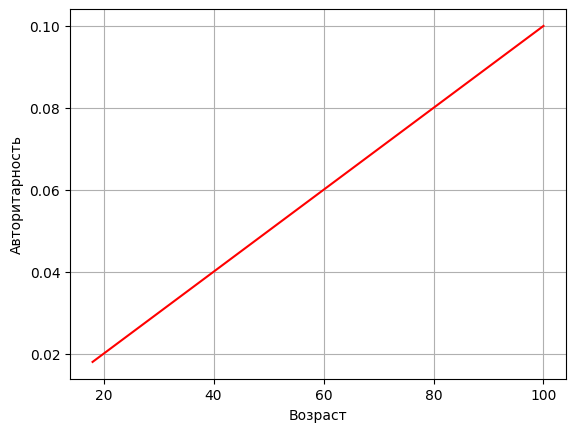

In [287]:
plt.plot(np.linspace(18,100,10),(0.0010)*(np.linspace(18,100,10)),c='r')
plt.ylabel('Авторитарность')
plt.xlabel('Возраст')
plt.grid()

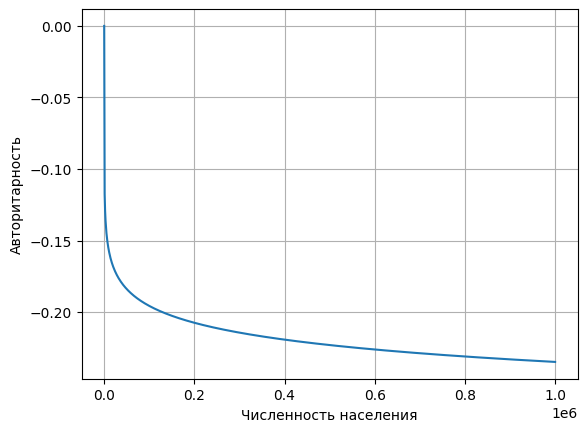

In [277]:
plt.plot(np.linspace(1,1000000,1000),(-0.0170)*np.log((np.linspace(1,1000000,1000))))
plt.ylabel('Авторитарность')
plt.xlabel('Численность населения')
plt.grid()

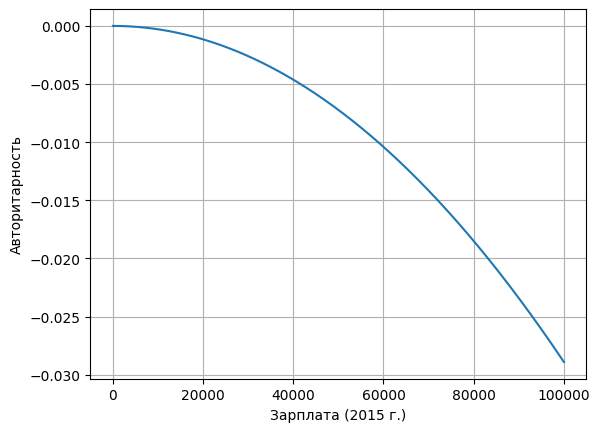

In [274]:
plt.plot(np.linspace(0,100000,1000),(-2.89e-12)*(np.linspace(0,100000,1000)**2))
plt.ylabel('Авторитарность')
plt.xlabel('Зарплата (2015 г.)')
plt.grid()

In [ ]:
plt.plot(np.linspace(0,100000,1000),(-2.89e-12)*(np.linspace(0,100000,1000)**2))
plt.ylabel('Авторитарность')
plt.xlabel('Зарплата (2015 г.)')
plt.grid()

In [229]:
(-2.969e-07)*10000

-0.0029690000000000003

In [249]:
results.params.index

Index(['Intercept', 'C(diplom)[T.законченное среднее образование]',
       'C(diplom)[T.законченное среднее специальное образование]',
       'C(diplom)[T.незаконченное среднее образование (7 - 8 кл)]',
       'C(diplom)[T.незаконченное среднее образование (7 - 8 кл) + что-то еще]',
       'C(diplom)[T.окончил 0 - 6 классов]', 'C(sex)[T.МУЖСКОЙ]',
       'C(status)[T.Областной центр]', 'C(status)[T.ПГТ]', 'C(status)[T.Село]',
       'C(region)[T.Алтайский край, Курьинский район]',
       'C(region)[T.Амурская область, Тамбовский район]',
       'C(region)[T.Владивосток]',
       'C(region)[T.Волгоградская область, Руднянский район]',
       'C(region)[T.Казань]',
       'C(region)[T.Калужская область, Куйбышевский район]',
       'C(region)[T.Коми Республика, Сыктывкар]',
       'C(region)[T.Коми Республика, Усинск и Усинский район]',
       'C(region)[T.Краснодар]',
       'C(region)[T.Краснодарский край, Кущевский район]',
       'C(region)[T.Красноярск]',
       'C(region)[T.Красноя

Text(0.5, 0, 'Авторитарность')

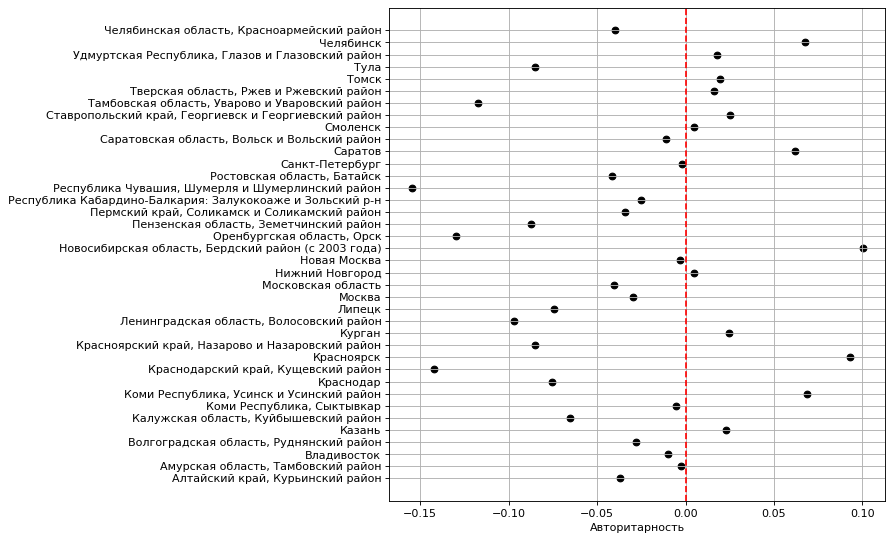

In [306]:
qqqq={}
for i in results.params.index:
    if 'C(region)' in i:
        qqqq[str(i).replace('C(region)','').replace('[','').replace(']','').replace('T.','')]=results.params[i]
        
plt.figure(figsize=(8, 8), dpi=80)
plt.grid()
plt.scatter(pd.Series(qqqq),pd.Series(qqqq).index,c='black')
plt.axvline(0,c='r',ls='--')
plt.xlabel('Авторитарность')

Text(0.5, 0, 'Авторитарность')

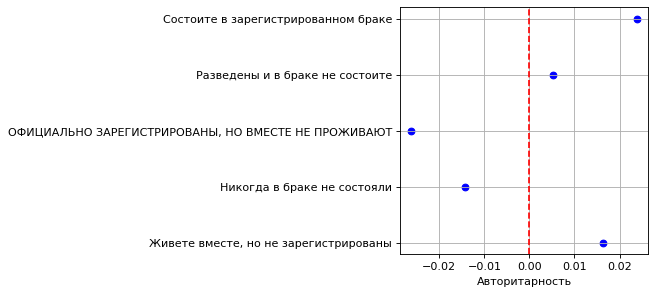

In [267]:
qqqq2={}
for i in results.params.index:
    if 'C(marst)' in i:
        qqqq2[str(i).replace('C(marst)','').replace('[','').replace(']','').replace('T.','')]=results.params[i]
        
plt.figure(figsize=(4, 4), dpi=80)
plt.grid()
plt.scatter(pd.Series(qqqq2),pd.Series(qqqq2).index,c='blue')
plt.axvline(0,c='r',ls='--')
plt.xlabel('Авторитарность')

Text(0.5, 0, 'Авторитарность')

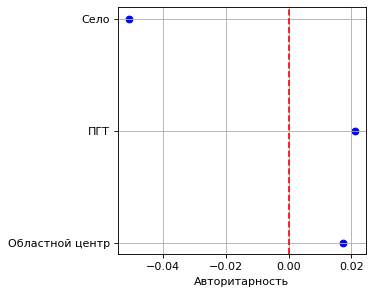

In [288]:
qqqq3={}
for i in results.params.index:
    if 'C(status)' in i:
        qqqq3[str(i).replace('C(status)','').replace('[','').replace(']','').replace('T.','')]=results.params[i]
        
plt.figure(figsize=(4, 4), dpi=80)
plt.grid()
plt.scatter(pd.Series(qqqq3),pd.Series(qqqq3).index,c='blue')
plt.axvline(0,c='r',ls='--')
plt.xlabel('Авторитарность')

In [126]:
reg = smf.ols(formula='autho~ educ_2015', data=work_df_dropped)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  autho   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.241
Date:                Sat, 01 Oct 2022   Prob (F-statistic):             0.0395
Time:                        19:39:08   Log-Likelihood:                -342.50
No. Observations:                9312   AIC:                             689.0
Df Residuals:                    9310   BIC:                             703.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7016      0.011     63.412      0.000       0.680       0.723
educ_2015     -0.0374      0.018     -2.059      0.039      -0.073      -0.002
==============================================================================
Omnibus:                      411.657   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              463.342
Skew:                          -0.540   Prob(JB):                    2.44e-101
Kurtosis:                       2.839   Cond. No.                         9.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'age')

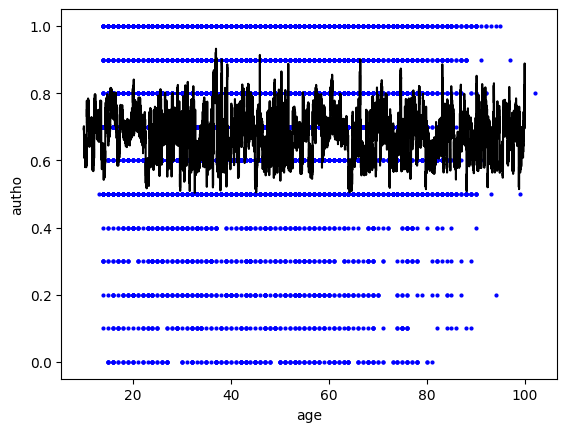

In [267]:
plt.scatter('age','autho', data=work_df_dropped, color='blue', marker='o', s=4)
plt.plot(np.linspace(10,100,9312), results.fittedvalues, color='black', linestyle='-')
plt.ylabel('autho')
plt.xlabel('age')

In [123]:
import statsmodels.api as sm

In [124]:
logit_mod = sm.Logit(formula='autho ~ educ_2015', data=work_df_dropped)
logit_res = logit_mod.fit(disp=0)
print("Parameters: ", logit_res.params)

TypeError: BinaryModel.__init__() missing 2 required positional arguments: 'endog' and 'exog'

In [118]:
results.resid

0        0.320059
1       -0.189667
2        0.321555
3        0.311829
4        0.317814
           ...   
12630    0.021555
12631    0.326792
12633   -0.173208
12634   -0.173208
12665   -0.178445
Length: 9312, dtype: float64

In [84]:
work_df_dropped['autho']=work_df_dropped['autho']-6

C:\Users\user\AppData\Local\Temp\ipykernel_4928\526698440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_df_dropped['autho']=work_df_dropped['autho']-6


In [96]:
work_df_dropped['educ_2015']=work_df_dropped['educ_2015']/25

C:\Users\user\AppData\Local\Temp\ipykernel_4928\2248756499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_df_dropped['educ_2015']=work_df_dropped['educ_2015']/25


In [104]:
work_df_dropped['autho']=(work_df_dropped['autho']+5)/10

C:\Users\user\AppData\Local\Temp\ipykernel_4928\3951447921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_df_dropped['autho']=(work_df_dropped['autho']+5)/10


In [105]:
work_df_dropped

,educ_2015,autho
0,0.58,1.0
1,0.32,0.5
2,0.62,1.0
3,0.36,1.0
4,0.52,1.0
...,...,...
12630,0.62,0.7
12631,0.76,1.0
12633,0.76,0.5
12634,0.76,0.5


In [79]:
work_df_dropped.columns=["educ_2015",'autho']

In [70]:
work_df.dropna()

,t_educ,tj410
0,14.5,11.0
1,8.0,6.0
2,15.5,11.0
3,9.0,11.0
4,13.0,11.0
...,...,...
12630,15.5,8.0
12631,19.0,11.0
12633,19.0,6.0
12634,19.0,6.0


In [39]:
FAST_INDS_DFS[2015]['tj410'].cat.categories

Index([                             2.0,                              3.0,
                                    4.0,                              5.0,
                                    7.0,                              8.0,
                                    9.0,                             10.0,
                 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',                     'НЕТ ОТВЕТА',
                    'ОСТАТЬСЯ КАК ЕСТЬ',                'ОТКАЗ ОТ ОТВЕТА',
            'СТАТЬ БОЛЕЕ ДЕМОКРАТИЧНОЙ', 'УСИЛИТЬ КОНТРОЛЬ НАД ПОЛИТИКОЙ'],
      dtype='object')

In [88]:
FAST_INDS_DFS[2015]['tj410']

0        УСИЛИТЬ КОНТРОЛЬ НАД ПОЛИТИКОЙ
1                     ОСТАТЬСЯ КАК ЕСТЬ
2        УСИЛИТЬ КОНТРОЛЬ НАД ПОЛИТИКОЙ
3        УСИЛИТЬ КОНТРОЛЬ НАД ПОЛИТИКОЙ
4        УСИЛИТЬ КОНТРОЛЬ НАД ПОЛИТИКОЙ
                      ...              
12662                               NaN
12663                               NaN
12664                               NaN
12665                 ОСТАТЬСЯ КАК ЕСТЬ
12666                               NaN
Name: tj410, Length: 12667, dtype: category
Categories (14, object): [2.0, 3.0, 4.0, 5.0, ..., 'ОСТАТЬСЯ КАК ЕСТЬ', 'ОТКАЗ ОТ ОТВЕТА', 'СТАТЬ БОЛЕЕ ДЕМОКРАТИЧНОЙ', 'УСИЛИТЬ КОНТРОЛЬ НАД ПОЛИТИКОЙ']

In [136]:
FAST_INDS_DFS[2015]['tj118.2 '].dropna()

KeyError: 'tj118.2 '

In [ ]:
J57 Сколько всего денег в течение последних 30 дней Вам заплатили за всю эту работу? Если
оплата производилась в неденежной форме, оцените, сколько это, примерно, будет в рублях?

In [55]:
FAST_INDS_DFS[1998]

,idind,dredid_i,did_i,did_h,cid_i,cid_h,bid_i,bid_h,aid_i,aid_h,...,do8,do9a,do9b,do10,do11a,do11b,do12a,do12b,do13a,do13b
0,1.0,27501.0,1010101.0,10101.0,1010101.0,10101.0,1010101.0,10101.0,100101.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,27502.0,1010102.0,10101.0,1010102.0,10101.0,1010102.0,10101.0,100102.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,27601.0,1010201.0,10102.0,1010201.0,10102.0,1010201.0,10102.0,100201.0,1002.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,27603.0,1010203.0,10102.0,1010203.0,10102.0,1010203.0,10102.0,100203.0,1002.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,27604.0,1010204.0,10102.0,1010204.0,10102.0,1010204.0,10102.0,100204.0,1002.0,...,Нет,NaN,NaN,Дa,25.0,0.0,1.0,0.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9599,16247.0,342905.0,157005105.0,1570051.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9600,16248.0,343404.0,158000204.0,1580002.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9601,16250.0,345108.0,160000408.0,1600004.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9602,16251.0,345309.0,160001209.0,1600012.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
FAST_INDS_DFS[2021]['z_educ']

0        10 и более классов школы и какое-либо професс....
1        7-9 классов школы (незак. средн) + ПТУ без дип...
2                                      техникум с дипломом
3                                          8 классов школы
4        10 и более классов школы и какое-либо професс....
                               ...                        
12064    10 и более классов школы и какое-либо професс....
12065                                  техникум с дипломом
12066             3 и более лет в высшем учебном заведении
12067                                  техникум с дипломом
12068    среднее образование - есть аттестат о ср. обра...
Name: z_educ, Length: 12069, dtype: category
Categories (25, object): ['0 классов школы', '1 класс школы', '1-2 года в высшем учебном заведении', '10 и более классов школы без аттестата о сред..., ..., 'аспирантура и т.п. с дипломом', 'есть диплом о высшем образовании', 'среднее образование - есть аттестат о ср. обр..., 'техникум с дипломом']

In [ ]:
FAST_INDS_DFS[2021]['z_educ']

In [20]:
#==============================================
def renaming_routine(df1,rename_del):
    if rename_del=='wave':
        for i in range(len(df1.columns)):
            df1.rename(columns={ df1.columns[i]: df1.columns[i][1:]}, inplace = True)
        return df1

# Общие переменные

In [ ]:
REGION Регион 
STATUS ТИП НАСЕЛЕННОГО ПУНКТА
POPUL ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ
MARST СЕМЕЙНОЕ ПОЛОЖЕНИЕ В ТЕКУЩЕЙ ВОЛНЕ 
OCCUP08 ПРОФЕССИОНАЛЬНАЯ ГРУППА - по коду J2COD08 
EDUC ОБРАЗОВАНИЕ (ПОДРОБНО): старше 14 лет
DIPLOM ЗАКОНЧЕННОЕ ОБРАЗОВАНИЕ (ГРУППА) 
DIPLOM_1 НАИБОЛЕЕ ВЕРОЯТНОЕ ЗАКОНЧЕННОЕ ОБРАЗОВАНИЕ (ГРУППА)

H5 Пол респондента
H6 Год рождения респондента (=J69.9C) 
AGE Количество полных лет
'''
I - Место рождения, язык, национальность и миграция
I1 Скажите, пожалуйста, Вы родились в другом населенном пункте или в том, где живете
сейчас?
I2 Скажите, пожалуйста, в какой республике бывшего СССР Вы родились? 
I3 Скажите, пожалуйста, Вы родились в городе, поселке городского типа или в селе, деревне,
кишлаке, ауле?
I4 Кем Вы себя считаете по национальности? Я имею в виду не обязательно ту национальность,
которая указана в Вашем паспорте
I5 На каком языке в основном Вы лично говорите дома? Если Вы говорите на нескольких
языках, уточните, какой язык Вы считаете основным
I6 Когда Вы были ребенком, на каком языке в основном pазговаpивали у Вас дома?
'''

In [31]:
codebook.name[codebook.name.values]

KeyError: False

In [46]:
('i1' in codebook.name)

False

In [50]:
codebook[codebook.name.str.contains('i')]

,name,variable_labels,all_year,code_value_labels,value_labels,R5_A_1994,R6_B_1995,R7_C_1996,R8_D_1998,R9_E_2000,...,R21_Q_2012,R22_R_2013,R23_S_2014,R24_T_2015,R25_U_2016,R26_V_2017,R27_W_2018,R28_X_2019,R29_Y_2020,R30_Z_2021
0,id_w,НОМЕР ВОЛНЫ,,5,1994 год,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,idind,Единый идентификационный номер индивида для во...,1994 1995 1996 1998 2000 2001 2002 2003 2004 2...,,,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
28,redid_i,НОМЕР ИНДИВИДА - СПЛОШНАЯ НУМЕРАЦИЯ,1994 1995 1996 1998 2000 2001 2002 2003 2004 2...,,,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
29,id_i,НОМЕР ИНДИВИДА - ИДЕНТИФИКАЦИОННЫЙ - УНИКАЛЬНЫ...,1994 1995 1996 1998 2000 2001 2002 2003 2004 2...,,,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
30,id_h,НОМЕР ДОМОХОЗЯЙСТВА - ИДЕНТИФИКАЦИОННЫЙ - УНИК...,1994 1995 1996 1998 2000 2001 2002 2003 2004 2...,,,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
31,origsm,АДРЕС РЕПРЕЗЕНТАТИВНОЙ ВЫБОРКИ,1994 1995 1996 1998 2000 2001 2002 2003 2004 2...,0,"Нет, не входит в репрезентативную выборку: пер...",1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
33,inwgt,Постстратификационный вес для данного индивида,1994 1995 1996 1998 2000 2001 2002 2003 2004 2...,,,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
34,region,Регион,1994 1995 1996 1998 2000 2001 2002 2003 2004 2...,1,"Ленинградская область, Волосовский район",1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
118,int_y,ГОД ПРОВЕДЕНИЯ ИНТЕРВЬЮ,1994 1995 1996 1998 2000 2001 2002 2003 2004 2...,,,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
121,child,Есть детский вопросник?,1994 1995 1996 1998 2000 2001 2002 2003 2004 2...,0,Нет детского вопросника,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [35]:
codebook.name.any('i1')

C:\Users\user\AppData\Local\Temp\ipykernel_3068\2880137261.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  codebook.name.any('i1')


ValueError: No axis named i1 for object type Series

# Политически релевантные переменные

In [12]:
{'Самооценка соц.статуса':['j62','j63','j64'],
# САМООЦЕНКА СОЦИАЛЬНОГО СТАТУСА
# J62 - Представьте себе, пожалуйста, лестницу из 9 ступеней, где на нижней, первой ступени, стоятнищие, а на высшей, девятой - богатые. На какой из девяти ступеней находитесь сегодня Вылично?
# J63 - А теперь представьте себе, пожалуйста, лестницу, из 9 ступеней, где на нижней ступенистоят совсем бесправные, а на высшей - те, у кого большая власть. На какой из девятиступеней находитесь сегодня Вы лично?
# J64 - И еще одна лестница из 9 ступеней, где на нижней ступени находятся люди, которых совсемне уважают, а на высшей - те, кого очень уважают. На какой из девяти ступеней находитесьсегодня Вы лично?
#-----------------------------------------
}
#J67 Возможно ли, на Ваш взгляд, взаимопонимание и сотрудничество между людьми бедными и богатыми?

#J68 А что Вы думаете о возможности взаимопонимания и сотрудничества между "простыми людьми" и теми, у кого много власти?


# Самоидентификация с соц. группой
J118 - Скажите, пожалуйста, насколько близко или далеко Вы чувствуете себя по отношению ...
1. рабочим
2. православным
3. интеллигентам
4. католикам
5. демократам
6. мусульманам
7. коммунистам
8. баптистам

J193 О ком Вы бы могли сказать: "Это - мы". Как часто Вы ощущаете близость, единство с людьми
1.Вашего поколения, возраста
2.той же профессии, рода занятий
3.о со всеми
гражданами России
4.жителями Вашего края, республики, области
5.кто живет в том же городе или селе, где и Вы
6.вашей национальности
7.того же достатка, что и Вы
8.близкими Вам по политическим взглядам
9.Вашей веры
10. о с другими
людьми, с кем именно




# Гендер

J119

J120 Кто должен быть главой семьи? Какое суждение ближе всего к Вашим представлениям по
этому вопросу:
J69.6 Согласны или не согласны Вы с тем, что при устройстве на любую работу мужчины и
женщины должны иметь равные возможности?
J69.6.1 Согласны или не согласны Вы с тем, что для семьи обычно плохо, если жена работает? 
J69.6.2 Согласны или не согласны вы с тем, что если жена работает, то она пользуется в семье
большим уважением, чем если она просто является домохозяйкой?
J69.6.3 Как Вы считаете, мужчины и женщины имеют равные возможности устроиться на хорошую,
высоко оплачиваемую работу или у мужчин такая возможность больше или у женщин такая
возможность больше?


J6964 Кому, мужчинам или женщинам, на ваш взгляд, больше подходит быть ....
1.учителем
2. директором средней
школы
3.кассиром
4. конструктором
5.директором магазина
6.ь депутатом городской
Думы, городского законодательного собрания
7.каменщиком
8.предпринимателем
9.депутатом
Государственной Думы
10.директором крупного
предприятия
11.министром в
Российском правительстве
12. врачом
13.судьей


    
# Соц. нормы
J121.1 Как Вы считаете, аборты всегда допустимы, допустимы только при определенных условиях
или никогда не допустимы?
J121.2 Как Вы считаете, секс вне брака всегда допустим, допустим только при определенных
условиях или никогда не допустим?
J121.3 Как Вы считаете, смертная казнь в случае тяжких преступлений всегда допустима, допустима
только при определенных условиях или никогда не допустима?
J121.4 Как Вы считаете, гомосексуальные связи всегда допустимы, допустимы только при
определенных условиях или никогда не допустимы?
J121.5 Как Вы считаете, разводы всегда допустимы, допустимы только при определенных условиях
или никогда не допустимы?

# Этнос

J69.3A Как бы вы отнеслись к браку Вашей дочери или сына с человеком другой национальности? 
J69.3B Как бы Вы отнеслись к тому, чтобы Вашим непосредственным начальником был человек иной
национальности, чем Ваша?




J69.4 Согласны или не согласны Вы с тем, что людям, которые управляют страной, все равно, что
будет с такими, как Вы?
J69.5 Согласны или не согласны Вы с тем, что лучше работать на частного хозяина, чем на
государство: и порядка больше, и заработки выше?

J69.6.5 Каким властям Вы доверяете больше, а каким меньше? 
J69.7 Согласны или не согласны Вы с тем, что государство должно ограничить доходы богатых?

# Цензура
J128.1 Как Вы думаете, государство должно разрешить или запретить книги, фильмы, средства
массовой информации, содержащие нападки на религию?
J128.2 Как Вы думаете, государство должно разрешить или запретить религии, которые не являются
традиционными для России?
J128.3 Как Вы думаете, государство должно разрешить или запретить религиозные группы, типа
"Свидетели Иеговы", "Адвентисты Седьмого дня", баптисты и другие, которые стараются
обратить людей в свою веру?
J128.4 Как Вы думаете, государство должно разрешить или запретить деятельность иностранных
проповедников?


J92 За кого Вы проголосовали в первом туре Президентских выборов?




J99.1 Как Вы думаете, на сколько процентов центральные власти отрабатывают налоги, которые
Вы платите?
J99.2 Как Вы думаете, на сколько процентов региональные власти отрабатывают налоги, которые
Вы платите?
J99.3 Как Вы думаете, на сколько процентов местные власти отрабатывают налоги, которые Вы
платите?

Налоги


J100 Как, по Вашему мнению, большинство людей платят налоги? 

J101.1 В какой мере следующая причина влияет на то, что у нас в стране не все платят налоги:
налоги слишком высокие?
J101.2 В какой мере следующая причина влияет на то, что у нас в стране не все платят налоги:
процедура уплаты налогов очень сложна и занимает много времени?
J101.3 В какой мере следующая причина влияет на то, что у нас в стране не все платят налоги:
люди не платят налоги, так как все вокруг не платят налоги?
J101.4 В какой мере следующая причина влияет на то, что у нас в стране не все платят налоги:
люди не платят налоги, т.к. считают, что власти всё равно используют их не на то, что нужно,
а то и просто разворуют?
J101.5 В какой мере другие причины влияют на то, что у нас в стране не все люди платят налоги со
своих доходов?


J102.1 Как Вы думаете, смогут ли коммунисты вывести Россию из кризиса? 
J102.2 Как Вы думаете, смогут ли предприниматели и бизнесмены вывести Россию из кризиса? 
J102.3 Как Вы думаете, смогут ли демократы вывести Россию из кризиса? 
J102.4 Как Вы думаете, смогут ли страны Запада вывести Россию из кризиса? 
J102.5 Как Вы думаете, сможет ли нынешнее правительство вывести Россию из кризиса?
J102.6 Как Вы думаете, сможет ли новая власть, которая придет после следующих выборов в
ГосДуму и на пост Президента, вывести Россию из кризиса?
J102.8 Как Вы думаете, сможет ли сам народ вывести Россию из кризиса? 
J102.9 Как Вы думаете, сможет ли кто-нибудь другой вывести Россию из кризиса?
J103 Как Вы считаете, нам нужно все вернуть к тому, как было до Горбачева, к социализму,
следует сохранить нынешний курс неизменным или поправить, скорректировать нынешний
курс?
J104 Ваше мнение о рыночной реформе? 
J106.1 Если бы выборы Президента России состоялись сегодня, за кого бы Вы проголосовали?
J106.2 Если бы выборы Президента России состоялись сегодня, за кого бы Вы проголосовали?
J106.3 Если бы выборы Президента России состоялись сегодня, за кого бы Вы проголосовали? 

J107 Какая политическая система, на Ваш взгляд, больше всего подходит для России? 



J108 26 марта 2000 года состоялись выборы Президента России. Скажите, Вы участвовали в этих
выборах?
J109 Не могли бы Вы сказать, за кого Вы проголосовали на президентских выборах? 

J110 Одним людям нравится деятельность Владимира Путина, другим не нравится. А Вы одобряете
или не одобряете деятельность Путина на посту Президента России?

# Коррупция
J112 Скажите, пожалуйста, как Вам подсказывает жизненный опыт, приходится ли сейчас людям
давать взятки чиновникам и работникам правоохранительных органов?
J113 А как Вам кажется, по сравнению с тем, что было раньше, взятки приходится давать чаще,
реже или так же?
J209.5 Насколько Вы согласны или не согласны с тем, что в последние годы коррупция в стране
уменьшается?


# Право

J114 Согласны или не согласны Вы с тем, что совсем не обязательно подчиняться закону, который
Вы считаете несправедливым?
J115 Есть ли такие действия и поступки, совершаемые людьми, которые закон считает
преступлением, а Вы - нет?

# Полит участие
J137 За последние три года Вы посещали встречи или выступления политических деятелей,
избранных на государственные посты?
J138 За последние три года Вы принимали участие в политических митингах, демонстрациях или
акциях протеста?
J139.1 Приходилось ли Вам за последние три года работать на добровольных началах в
сотрудничестве с другими людьми в своем населенном пункте, пытаясь решить какие-либо
проблемы населенного пункта?
J139.2 Приходилось ли Вам за последние три года принимать участие в создании новой группы или
организации для решения каких-либо общественных проблем местного характера?
J139.3 Приходилось ли Вам за последние три года писать письмо кому-нибудь из местного,
районного руководства или другому официальному лицу местного уровня по любым
проблемам или нуждам?
J139.4 Приходилось ли Вам за последние три года приходить на прием к кому-нибудь из местного,
районного руководства или другому официальному лицу местного уровня по любым
проблемам или нуждам?
J139.5 Приходилось ли Вам за последние три года писать письмо кому-нибудь из руководства или
официальных лиц правительства областного, окружного или федерального уровня по любой
проблеме или вопросу?
J139.6 Приходилось ли Вам за последние три года писать письмо в средства массовой информации,
чтобы выразить свои политические взгляды?


J140 За последние три года Вы участвовали в забастовках?
J141 Приходилось ли Вам за последние три года на добровольных началах участвовать в
деятельности какой-либо некоммерческой негосударственной организации?
J142 Приходилось ли Вам за последние три года вносить деньги в фонд какой-либо
некоммерческой негосударственной организации?
J143.1 Скажите, пожалуйста, являетесь ли Вы в настоящее время членом какой-либо политической
партии?
J143.2 Скажите, пожалуйста, являетесь ли Вы в настоящее время членом какой-либо другой
политической организации?
J143.3 Являетесь ли Вы в наст.вр. членом к.-л. некоммерч. негос. орг-ии, такой как церковная или
религиозн. организация, экологич. или природоохран. орг-я,орг-я по правам человека, по
соц.обеспечению, охране здоровья, женская орг-я и т.п.?


J368 А как изменилась, по Вашему мнению, работа милиции в Вашем (городе/поселке/селе)? 


# Преступность
J329 Представьте, что Вы идете в одиночестве после наступления темноты в том районе, где Вы
живете. Насколько безопасно Вы себя чувствуете в такой ситуации?

J330 Как часто Вас беспокоит мысль о том, что (Ваш дом/ Вашу квартиру) могут ограбить или
обокрасть?
J331 Как часто Вас беспокоит мысль о том, что Вы можете стать жертвой нападения?
J364 В течение последних 5 лет приходилось Вам сталкиваться с работой милиции, например, при
оформлении документов, подаче заявления о краже или другом преступлении, выступая в
роли свидетеля или подозреваемого, при разборе ДТП или в других случаях?
J365 А приходилось Вам лично в течение последних 5 лет сталкиваться с необходимостью
неофициально платить работникам милиции?
J332 В течение последних 5 лет случалось так, что Вы или члены Вашей семьи становились
жертвами грабежа, нападения или насилия
J366.1 Что Вы предприняли после того, как пострадали от преступления? Обратились с заявлением в
милицию?
J366.2 Что Вы предприняли после того, как пострадали от преступления? Обратились к друзьям,
знакомым, использовали свои личные связи?
J366.3 Что Вы предприняли после того, как пострадали от преступления? Решали проблему
самостоятельно?
J366.4 Что Вы предприняли после того, как пострадали от преступления? Ничего не предпринимали?
J367 Оцените, пожалуйста, как работает милиция в Вашем (городе/поселке/селе)? 

SyntaxError: unterminated string literal (detected at line 10) (942919186.py, line 10)

In [ ]:
J173.1 Насколько Вы согласны или не согласны со следующими утверждениями: если человек
считает закон несправедливым, он имеет право "обойти его"?
J173.2 Насколько Вы согласны или не согласны со следующими утверждениями: судьи в России "продажны"?
J173.3 Насколько Вы согласны или не согласны со следующими утверждениями: в России нельзя жить, не нарушая законы?
J173.4 Насколько Вы согласны или не согласны со следующими утверждениями: если высшие
государственные или политические деятели не соблюдают законы, то и простые люди могут
не соблюдать законы?
J174.1 В какой степени следующие причины мешают жителям нашей страны обращаться в суды:
высокая стоимость подачи иска?
J174.2 В какой степени следующие причины мешают жителям нашей страны обращаться в суды:
высокая стоимость услуг юристов и адвокатов?
J174.3 В какой степени следующие причины мешают жителям нашей страны обращаться в суды:
необъективность судей?
J174.4 В какой степени следующие причины мешают жителям нашей страны обращаться в суды:
низкий профессиональный уровень судей?
J174.5 В какой степени следующие причины мешают жителям нашей страны обращаться в суды:
слишком долго решаются дела в суде?
J174.6 В какой степени следующие причины мешают жителям нашей страны обращаться в суды:
решения суда часто не выполняются?
J176 Приходилось ли в течение последних пяти лет иметь дело с судами: 
J402 Каким было судебное дело, когда Вы имели дело с судом? 
J403 Какой была Ваша роль в этом судебном деле?
J404 Какой была Ваша роль в этом судебном деле?

In [ ]:
J108A 14 марта 2004 г. состоялись выборы Президента России. Вы участвовали в этих выборах?
J109A Не могли бы Вы сказать, за кого Вы проголосовали на президентских выборах?
J182 Вы участвовали в выборах в Государственную Думу 7 декабря 2003 года?
J183 Не могли бы Вы сказать, за какую партию или блок Вы проголосовали?

In [ ]:
J207.1 В какой степени Вы доверяете правительству Российской Федерации? 
J207.2 В какой степени Вы доверяете Государственной Думе?
J207.3 В какой степени Вы доверяете судам?
J207.5 В какой степени Вы доверяете армии?
J207.6 В какой степени Вы доверяете милиции?
J207.7 В какой степени Вы доверяете российским банкам?
J207.8 В какой степени Вы доверяете иностранным банкам?
J207.9 В какой степени Вы доверяете страховым компаниям?
J207.10 В какой степени Вы доверяете мелкому и среднему частному бизнесу? 
J207.11 В какой степени Вы доверяете политическим партиям?

In [ ]:
либ ценности

J208.1 Насколько для Вас лично важно, чтобы в нашей стране сегодня были свободные и честные
выборы?
J208.2 Насколько для Вас лично важно, чтобы в нашей стране сегодня были закон и порядок?
J208.3 Насколько для Вас лично важно, чтобы в нашей стране сегодня была свобода слова? 
J208.4 Насколько для Вас лично важно, чтобы в нашей стране сегодня была независимая пресса?
J208.5 Насколько для Вас лично важно, чтобы в нашей стране сегодня была политическая
оппозиция?
J208.6 Насколько для Вас лично важно, чтобы в нашей стране сегодня были справедливые суды?
J208.7 Насколько для Вас лично важно, чтобы в нашей стране сегодня была защита прав
национальных, религиозных и прочих меньшинств?
J209.1 Насколько Вы согласны или не согласны с тем, что избираемые руководители страны должны
находиться у власти не более двух сроков подряд?
J209.2 Насколько Вы согласны или не согласны с тем, что главы регионов - то есть губернаторы и
президенты республик - должны назначаться, а не избираться?
J209.3 Насколько Вы согласны или не согласны с тем, что руководство страны заботится об
интересах таких людей, как вы, когда принимает решения?
J209.4 Насколько Вы согласны или не согласны с тем, что руководство регионов заботится об
интересах таких людей, как вы, когда принимает решения?


In [ ]:
J209.6 Насколько Вы согласны или не согласны с тем, что Россия недостаточно влияет на события,
которые происходят в мире?
J210 Что, по Вашему мнению, лучше всего объясняет, почему самые богатые россияне стали
такими богатыми:
1. ЗАРАБОТАЛИ СВОЙ КАПИТАЛ СОБСТВЕННЫМ ТРУДОМ И ТАЛАНТОМ

2. СТАЛИ БОГАТЫМИ, ПОТОМУ ЧТО ИМ ПРОСТО ПОВЕЗЛО

3. РАЗБОГАТЕЛИ ПРИ ПОМОЩИ КРИМИНАЛЬНОЙ ДЕЯТЕЛЬНОСТИ
4. СТАЛИ БОГАТЫМИ БЛАГОДАРЯ СВОИМ ПОЛИТИЧЕСКИМ СВЯЗЯМ


J211 Как Вы думаете, что нужно, чтобы сегодня стать миллионером у нас в стране?
.01 МНОГО
РАБОТАТЬ
02 ИМЕТЬ
ХОРОШЕЕ ОБРАЗОВАНИЕ
03 ИМЕТЬ ТАЛАНТ
04 ? ИМЕТЬ
ПОЛИТИЧЕСКИЕ СВЯЗИ
05 ИМЕТЬ СВЯЗИ
В БИЗНЕСЕ

06 ? БЫТЬ
СВЯЗАННЫМ С КРИМИНАЛЬНЫМИ КРУГАМИ
07   ЗАНИМАТЬСЯ
КРИМИНАЛЬНОЙ ДЕЯТЕЛЬНОСТЬЮ

In [ ]:
J212 Всегда есть люди, которые живут беднее других. Как Вы думаете, почему именно эти люди
сегодня беднее других?
J213 Что в нашем обществе сегодня люди уважают больше всего? 

In [ ]:
religion_dict={
    "J72.18": "Каково Ваше отношение к религии?",
    J72.19 К какой религии Вы себя относите?,
    J131.1 Посещаете ли Вы религиозные службы, собрания или другие религиозные мероприятия? Если
да, то как часто?,
    
}

In [ ]:
# Религия
J72.18 Каково Ваше отношение к религии? 

J72.19 К какой религии Вы себя относите? 

J131.1 Посещаете ли Вы религиозные службы, собрания или другие религиозные мероприятия? Если
да, то как часто?

J127.1 Как Вы думаете, какую религию государство должно поддерживать прежде всего?

J127.2 Еще какую религию должно поддерживать государство?

J127.3 Еще какую религию должно поддерживать государство?

J128.5 Как Вы думаете, государство должно разрешить или запретить преподавание основ религии в
школе по желанию учеников и их родителей?



# Метрика феминизм/сексизм

In [ ]:
j69.6
j6964
j119
j120